<a href="https://colab.research.google.com/github/Harshi-63/AD-Lab/blob/main/Lab-2/CatDogModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1


In [2]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


^C
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing the important libraries 
import pandas as pd 
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

# Set seed for reproducibility
seed = 123

# Define the directory paths for the training and validation datasets
train_dir = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1/train"
validation_dir = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1/test"

# Use the image_dataset_from_directory function to create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    validation_split=0.2,
     subset="training",
    seed=seed
)

# Use the image_dataset_from_directory function to create validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    validation_split=0.2,
    subset="validation",
    seed=seed
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


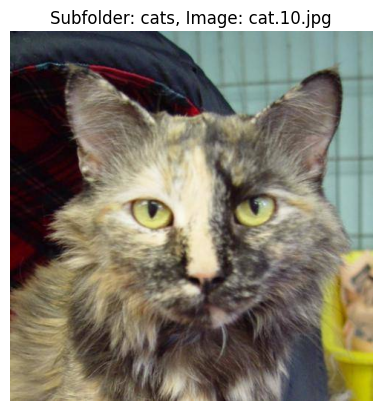

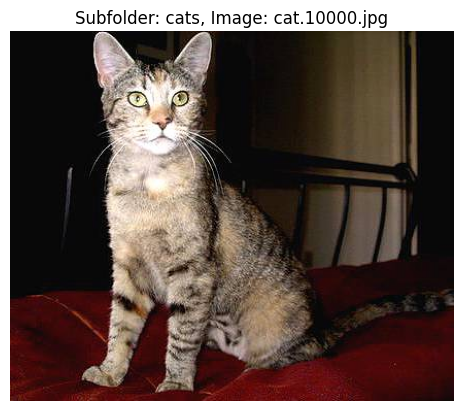

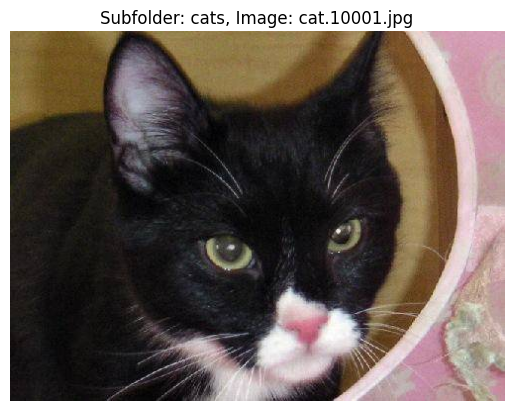

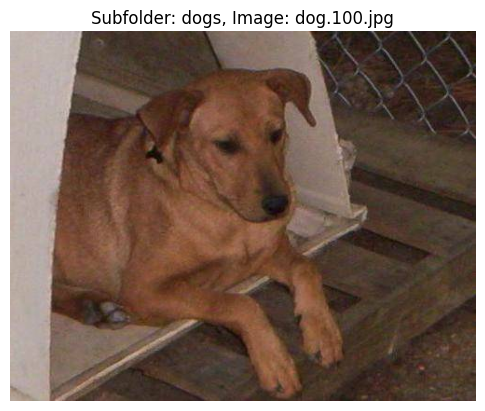

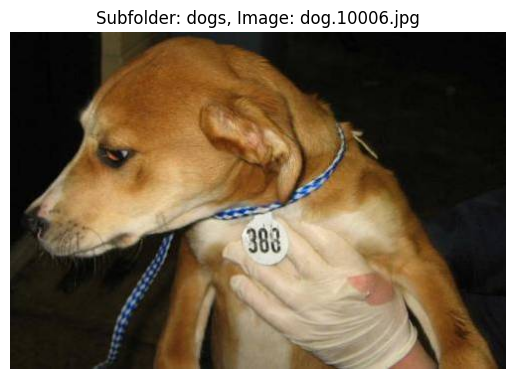

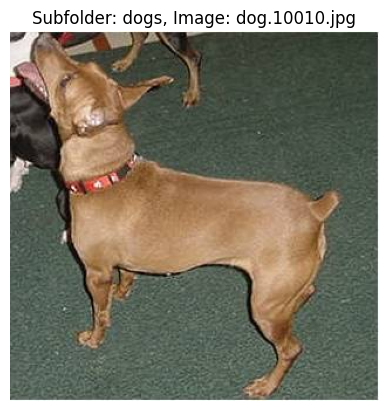

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the main folder
main_folder = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1/test"

# Display images from each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()


In [4]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1/train"

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


In [6]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [7]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [8]:
# Import required libraries
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set dataset path
dataset_path = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1\train"
image_size = (64, 64)  # Resize images

# Function to load images from a folder and assign labels
def load_images_from_folder(folder, label):
    images, labels = [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)  # Resize
            img = img / 255.0  # Normalize (for CNN)
            images.append(img)
            labels.append(label)
    return images, labels

# Load cats and dogs images
cats, cat_labels = load_images_from_folder(os.path.join(dataset_path, "cats"), 0)
dogs, dog_labels = load_images_from_folder(os.path.join(dataset_path, "dogs"), 1)

# Prepare dataset
X = np.array(cats + dogs)  # Features
y = np.array(cat_labels + dog_labels)  # Labels

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten images for traditional ML models
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Further steps (CNN, SVM, etc.) can proceed as previously outlined



In [9]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate CNN
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print("CNN Accuracy:", cnn_acc)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.5847 - loss: 0.6712 - val_accuracy: 0.7297 - val_loss: 0.5402
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.7402 - loss: 0.5248 - val_accuracy: 0.7538 - val_loss: 0.5023
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7870 - loss: 0.4546 - val_accuracy: 0.7725 - val_loss: 0.4946
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8172 - loss: 0.4030 - val_accuracy: 0.7812 - val_loss: 0.4674
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8440 - loss: 0.3522 - val_accuracy: 0.7922 - val_loss: 0.4647
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.8747 - loss: 0.2923 - val_accuracy: 0.7820 - val_loss: 0.5254
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9072 - loss: 0.2293 - val_accuracy: 0.7855 - val_loss: 0.5494
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9354 - loss: 0.1636 - 

In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor
import gc  # Garbage collector to free up memory

# Dataset path
dataset_path = r"C:\Users\KIIT\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1"

# VGG16 model for feature extraction (without top layer)
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

def extract_features_from_image(image_path):
    """Extract features from a single image using VGG16"""
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    features = vgg16.predict(img_array)
    # Use average pooling (instead of flattening all features)
    return features.mean(axis=(1, 2)).flatten()

def load_images_from_folder(folder, label, max_images=None):
    """Load images and extract features in parallel"""
    features = []
    labels = []
    
    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor(max_workers=4) as executor:  # Limit number of threads
        futures = []
        counter = 0
        for filename in os.listdir(folder):
            if max_images and counter >= max_images:
                break
            img_path = os.path.join(folder, filename)
            futures.append(executor.submit(extract_features_from_image, img_path))
            counter += 1
        
        for future in futures:
            feature = future.result()
            features.append(feature)
            labels.append(label)
    
    return features, labels

# Load cats and dogs images from dataset (reduce number of images for testing)
cats_folder = os.path.join(dataset_path, "train/cats")
dogs_folder = os.path.join(dataset_path, "train/dogs")

# Extract features from images concurrently (limit the number of images to test)
cats_features, cats_labels = load_images_from_folder(cats_folder, 0, max_images=2000)  # Limit for testing
dogs_features, dogs_labels = load_images_from_folder(dogs_folder, 1, max_images=2000)  # Limit for testing

# Combine features and labels for training
X = np.array(cats_features + dogs_features)
y = np.array(cats_labels + dogs_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for traditional models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models (SVM, Random Forest, Logistic Regression, KMeans)
svm_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, random_state=42)
svm_sgd.fit(X_train_scaled, y_train)
y_pred_svm = svm_sgd.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)
kmeans_accuracy = accuracy_score(y_test, y_pred_kmeans)

# Print accuracies
print(f"SVM (SGD) Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"KMeans Accuracy: {kmeans_accuracy:.2f}")

# Free memory after each training phase
gc.collect()

# Save extracted features (to avoid re-processing next time)
np.save("cats_features.npy", np.array(cats_features))
np.save("dogs_features.npy", np.array(dogs_features))

print("Feature extraction and training complete!")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
print(f"SVM (SGD) Accuracy: {svm_accuracy:.2f}")

SVM (SGD) Accuracy: 0.80


In [13]:
# Saving traditional models using joblib
import joblib

# Save SVM model
joblib.dump(svm_sgd, 'svm_sgd_model.pkl')

# Save Random Forest model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Save Logistic Regression model
joblib.dump(log_reg, 'logreg_model.pkl')

# Save KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Saving the CNN model (using TensorFlow's save method)
cnn_model.save('cnn_model.h5')
